Do something

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, t

In [7]:
# https://statisticsbyjim.com/hypothesis-testing/one-tailed-two-tailed-hypothesis-tests/

# Example data: accuracy values from two models (A and B)
model_a = np.array([0.85, 0.89, 0.91, 0.87, 0.90])  # Model A accuracies
model_b = np.array([0.83, 0.88, 0.91, 0.86, 0.89])  # Model B accuracies

# Perform the paired t-test (two-tailed test first)
t_statistic, p_value_two_tailed = ttest_rel(model_a, model_b)

print("Two-Tailed Test Results:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value (two-tailed): {p_value_two_tailed:.4f}")

alpha = 0.05  # Significance level


print("\nPerforming two-tailed test ...")
if p_value_two_tailed < alpha:
    print("Reject the null hypothesis: There is a significant difference between the models.")
    # Perform an upper-tailed test
    print("Performing upper-tailed test ...")
    p_value_upper_tailed = p_value_two_tailed / 2 # Divide the two-tailed p-value by 2 to simply obtained the upper-tailed test
    if t_statistic > 0 and p_value_upper_tailed < alpha:
        print("Model A performs significantly better than Model B.")
    else:
        print("Model A does not perform significantly better than Model B -> Model B performs significantly better than Model A.")
else:
    print("Confirm the null hypothesis: No significant difference between the models.")


Two-Tailed Test Results:
t-statistic: 3.1623
p-value (two-tailed): 0.0341

Performing two-tailed test ...
Reject the null hypothesis: There is a significant difference between the models.
Performing upper-tailed test ...
Model A performs significantly better than Model B.


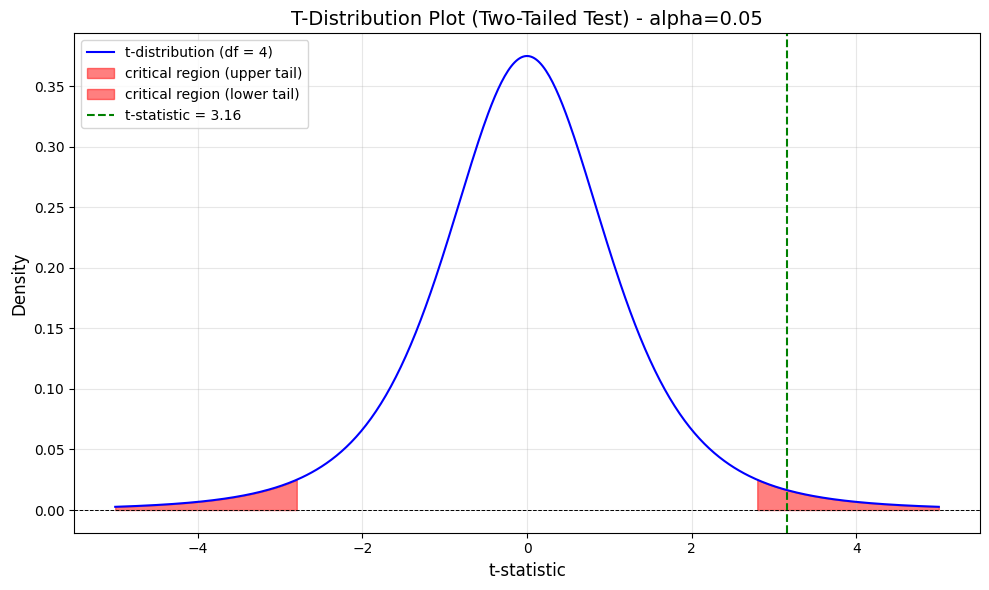

In [8]:
# Calculate differences
differences = model_a - model_b
df = len(differences) - 1 # degrees of freedom

# Define t-distribution for visualization
# Here we generate 500 evenly spaced points between x_min and x_max. These points will be used as the x-values for plotting the 
# t-distribution curve.
x_min = min(-5, t_statistic - 1)
x_max = max(5, t_statistic + 1)
x = np.linspace(x_min, x_max, 500)
t_distribution = t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, t_distribution, label="t-distribution (df = {})".format(df), color="blue")

# Highlight the p-value regions
critical_value = t.ppf(1 - alpha/2, df)  # Two-tailed critical value
plt.fill_between(x, 0, t_distribution, where=(x >= critical_value), color='red', alpha=0.5, label='critical region (upper tail)')
plt.fill_between(x, 0, t_distribution, where=(x <= -critical_value), color='red', alpha=0.5, label='critical region (lower tail)')

# Plot our t-statistic
plt.axvline(t_statistic, color="green", linestyle="--", label=f"t-statistic = {t_statistic:.2f}")

# Titles and labels
plt.title(f"T-Distribution Plot (Two-Tailed Test) - alpha={alpha}", fontsize=14)
plt.xlabel("t-statistic", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.axhline(0, color="black", linewidth=0.7, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()
